<h3> ข้อสอบกลางภาคเรียนที่ 1 ปีการศึกษา 2563 </h3> 
คณะวิทยาการสารสนเทศ มหาวิทยาลัยบูรพา <br>
รายวิชา 88637259 Web Mining and Social Media Data Analysis <br> 
สอบวันที่ 11 ก.ย. 2563 เวลา 13:00 - 16:00 น. อาคารคณะวิทยาการสารสนเทศ <br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**ข้อมูล Twitter #StayHome ณ วันที่ 2020-03-19** </br>
ดูรายละเอียดคอลัมภ์ได้จากเว็บ Kaggle ด้านล่าง <br>
https://www.kaggle.com/robertvici/stay-at-home-tweets-covid19 <br>
 
 ข้อมูลถูกแบ่งออกเป็นสามสาม <br>
 part1: https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part1.csv<br>
 part2: https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part2.csv<br>
 part3: https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part3.csv<bt>

### **คำถามข้อที่ 0**

---


อ่านข้อมูลจากข้อมูลที่เตรียมไว้ให้ (สามส่วนที่ถูกแบ่ง) เพื่อรวมกันเป็น 1 Dataframe

---



In [ ]:
p1= pd.read_csv('https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part1.csv')
FP1 = pd.DataFrame(p1)
FP1

In [ ]:
p2= pd.read_csv('https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part2.csv')
FP2 = pd.DataFrame(p2)
FP2

In [ ]:
p3= pd.read_csv('https://raw.githubusercontent.com/ABChamp/python_programming_buu_class/master/data/twitter_stayhome_part3.csv')
FP3 = pd.DataFrame(p3)
FP3

In [ ]:
data = pd.merge(FP1,FP2)
total = pd.merge(data,FP3)
total

id_merge            id  ...  trans_src trans_dest
0             0  1.239155e+18  ...        NaN        NaN
1             1  1.239155e+18  ...        NaN        NaN
2             2  1.239155e+18  ...        NaN        NaN
3             3  1.239155e+18  ...        NaN        NaN
4             4  1.239155e+18  ...        NaN        NaN
...         ...           ...  ...        ...        ...
25391     25391  1.239075e+18  ...        NaN        NaN
25392     25392  1.239075e+18  ...        NaN        NaN
25393     25393           NaN  ...        NaN        NaN
25394     25394  1.239075e+18  ...        NaN        NaN
25395     25395  1.239075e+18  ...        NaN        NaN

[25396 rows x 35 columns]

### **คำถามข้อที่ 1**
ถ้าแบ่งช่วงเวลาออกเป็น ช่วงกลางวัน (ตั้งแต่ 06:00AM - 06:00PM) และช่วงกลางคืน (ตั้งแต่ 06:01PM - 05:59AM) ผู้ใช้ (user)ที่มีการ tweet **ข้อความมากที่สุด 3 อันดับแรก** ในช่วงกลางวัน คือผู้ใช้ที่ใช้  user name อะไรบ้าง

In [ ]:
tweettime = total.loc[:,['created_at','username','tweet']]
time = tweettime.dropna(subset=['created_at','username'])
time

created_at  ...                                              tweet
0      2020-03-15 11:41:47  ...  What’s for lunch? Sticky “chicken” with vegs #...
1      2020-03-15 11:41:57  ...                           Wish me luck #StayAtHome
2      2020-03-15 11:41:59  ...  In the official account of President Republic ...
3      2020-03-15 11:41:30  ...  Sosial-distancing doesn't mean you need to be ...
4      2020-03-15 11:42:24  ...  Encouraging the "national day of prayer" is go...
...                    ...  ...                                                ...
25389  2020-03-15 06:26:01  ...  Holidayed in Eyam a few years ago in a cottage...
25391  2020-03-15 06:26:09  ...  The next two weeks will be eye-opening. Make s...
25392  2020-03-15 06:26:19  ...  It's scary, especially considering he is a 78-...
25394  2020-03-15 06:26:27  ...  Easy to stay at home when you’re on £50k a wee...
25395  2020-03-15 06:25:48  ...  Dili man ko DDS, infact sometimes basher sad k...

[20396 rows x 3 columns]

### **คำถามข้อที่ 2**
จากคำตอบที่ได้ในคำถามข้อที่ 1 ผู้ใช้ (user) ที่มีการ tweet สูงที่สุด มีจำนวนของการ retweet เท่าไร

In [ ]:
tweettime = total.loc[:,['created_at','username','tweet','retweets_count']]
UserT = tweettime.dropna(subset=['created_at','username','tweet','retweets_count'])
RET = UserT['username'].value_counts()
RET

jl_mico           30
flbarbella        23
fcbarcelona       15
deepinspection    14
fusunbaumann      13
                  ..
rantos101          1
picklerick___      1
saundersm3901      1
elizabemcgowan     1
rolexbeach         1
Name: username, Length: 18873, dtype: int64

### **คำถามข้อที่ 3**
จากคำถามข้อที่ 1 ผู้ใช้ (user) ที่มีการ tweet สูงที่สุด 3 อันดับแรกในช่วงกลางวัน เทียบกับ 3 อันดับแรกในช่วงกลางคืน มีกี่คนที่เป็น ผู้ใช้ (user) คนเดียวกัน และ user ใดบ้าง

In [ ]:
#เติมโปรแกรมสำหรับคำถามข้อที่ 3

### **คำถามข้อที่ 4**
User ที่มีจำนวน mentions ของการ tweet มากที่สุดเรียง 10 อันดับ เรียงจากมากไปน้อย

In [ ]:
tweetment = total.loc[:,['username','tweet','mentions']]
ment = tweetment.dropna(subset=['username','tweet','mentions'])
Ansment = ment['username'].value_counts()[0:10]
userment = pd.DataFrame(Ansment)
userment

username
jl_mico                30
flbarbella             23
fcbarcelona            15
deepinspection         14
fusunbaumann           13
coronavirusari1        13
finitorralba           11
worldcovid19            9
harriedilemma           8
daft_editor             8

### **คำถามข้อที่ 5**
จากคำถามข้อที่ 4 ให้นิสิตสร้างกราฟที่แสดงจำนวน mentions ของแต่ละ user เรียง 10 อันดับ จากมากไปน้อย <br>

แกน x เป็นรายชื่อ user <br>
แกน y แสดงจำนวนของ mention หน่วยเป็น (ครั้ง)

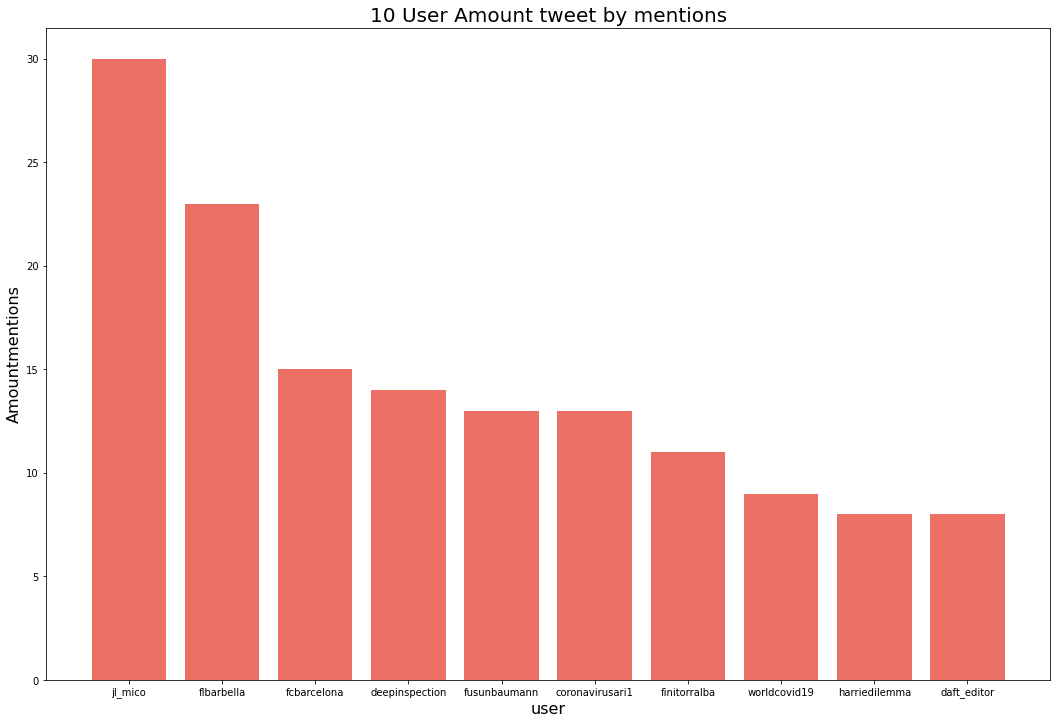

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)
index = ['jl_mico','flbarbella','fcbarcelona','deepinspection','fusunbaumann','coronavirusari1','finitorralba','worldcovid19','harriedilemma',	'daft_editor']
value = [30,23,15,14,13,13,11,9,8,8]
plt.title('10 User Amount tweet by mentions',size=float(20))

plt.bar(index,value,width = 0.5)
ax.bar(index,value,color ='#EC7063')
ax.set_xlabel('user',size=float(16))
ax.set_ylabel('Amountmentions',size=float(16))
plt.show()

### **คำถามข้อที่ 6**

สร้างกราฟแสดง tweet id ที่มีข้อความใน tweet มีจำนวนตัวอักษรมากที่สุดจำนวน 10 อันดับ เรียงจากมากไปน้อย *โดยข้อความใน* tweet จะต้องมี hashtag #stayathome อยู่ในข้อความ 

แกน x เป็น tweet id <br> 
แกน y เป็นจำนวนตัวอักษรในข้อความที่ tweet <br>

In [ ]:
tweetid = total.loc[:,['id','username','tweet']]
id = tweetid.dropna(subset=['id','username','tweet'])
id

id  ...                                              tweet
0      1.239155e+18  ...  What’s for lunch? Sticky “chicken” with vegs #...
1      1.239155e+18  ...                           Wish me luck #StayAtHome
2      1.239155e+18  ...  In the official account of President Republic ...
3      1.239155e+18  ...  Sosial-distancing doesn't mean you need to be ...
4      1.239155e+18  ...  Encouraging the "national day of prayer" is go...
...             ...  ...                                                ...
25389  1.239075e+18  ...  Holidayed in Eyam a few years ago in a cottage...
25391  1.239075e+18  ...  The next two weeks will be eye-opening. Make s...
25392  1.239075e+18  ...  It's scary, especially considering he is a 78-...
25394  1.239075e+18  ...  Easy to stay at home when you’re on £50k a wee...
25395  1.239075e+18  ...  Dili man ko DDS, infact sometimes basher sad k...

[20396 rows x 3 columns]

In [ ]:
check = id['tweet'].length()
check

AttributeError: ignored

### **คำถามข้อที่ 7**



สร้างกราฟแสดง tweet id ที่มีจำนวน retweets ของ tweet มากที่สุด 10 อันดับ โดยมีเงื่อนไขคือ tweet ต้องมีการ mentions มากกว่าเท่ากับ 5 คนขึ้นไป  

<BR>
แกน x คือ tweet id <br>
แกน y คือ จำนวน retweets ของ tweet นั้น โดยเลือกมาจาก tweet ที่มีการ mentions มากกว่า 5 คน

In [ ]:
retweet = total.loc[:,['username','tweet','mentions','retweets_count']]
#dataRE = retweet.dropna(subset=['username','tweet','mentions','retweets_count'])
retweet['mentions'].value_counts()

[]                                                           12363
['borisjohnson']                                                93
['realdonaldtrump']                                             44
['aoc']                                                         42
['piersmorgan']                                                 35
                                                             ...  
['isfsports']                                                    1
['hackintimseeley']                                              1
['toffeetvefc']                                                  1
['bayern_mania']                                                 1
['dorothybruce14', 'vfreebirdv', 'scotgov', 'niceconvos']        1
Name: mentions, Length: 6691, dtype: int64

### **คำถามข้อที่ 8**
สร้างกราฟแสดง tweet id ที่มีการถูกตอบ (replies) tweet มากที่สุด 10 อันดับ โดยมีเงื่อนไขคือ tweet จะต้องมีคำว่า Corona หรือ stay at home ทั้งตัวใหญ่ (CORONA, STAY AT HOME), ตัวเล็ก (corona, stay at home) และตัวใหญ่ตัวแรก (Corona, Stay at home, Stay At Home)

<br>
แกน x คือ tweet id <br> 
แกน y คือจำนวนที่ถูกตอบ (replies) ของ tweet ที่มีคำที่กำหนดให้ในโจทย์

In [ ]:
#เติมโปรแกรมสำหรับคำถามข้อที่ 8

### **คำถามข้อที่ 9**

**จากข้อมูลที่ให้มา** 
<BR>
จำนวนครั้งของการใช้ Hashtag #stayathome #covid รวมกันมีจำนวนที่ครั้ง (นับโดยไม่สนใจตัวพิมพ์ใหญ่ หรือพิมพ์เล็ก)

In [ ]:
Hashtag = total[total['hashtags'].str.contains("#stayathome")].loc[:,['username','tweet','hashtags']]
AnsHashtag = Hashtag.dropna(subset=['username','tweet','hashtags'])
AnsHashtag

ValueError: ignored

### **คำถามข้อที่ 10**

**จากข้อมูลที่ให้มา** 
<BR>
มีจำนวน username ที่ tweet ข้อความ อยู่กี่ user 

In [ ]:
usertweet = total.loc[:,['username','tweet']]
TotalUser= usertweet.dropna(subset=['username','tweet'])
AnsTotalUser = TotalUser['username'].value_counts()
AnsTotalUser.keys()

Index(['jl_mico', 'flbarbella', 'fcbarcelona', 'deepinspection',
       'fusunbaumann', 'coronavirusari1', 'finitorralba', 'worldcovid19',
       'harriedilemma', 'daft_editor',
       ...
       'apollinalre', 'noob_killa11223', 'bilal_arif_', 'gigabecquerel',
       'ccaln', 'rantos101', 'picklerick___', 'saundersm3901',
       'elizabemcgowan', 'rolexbeach'],
      dtype='object', length=18873)